# Henry coefficient Calculations

TODO: `functional_group_to_latex_label = Dict("CH3" => L"CH$_3$")`

In [1]:
using PorousMaterials
using JLD2
using PyPlot
using LaTeXStrings

In [2]:
# PyPlot.matplotlib.style.use("Solarize_Light2")
PyPlot.matplotlib.style.use("ggplot")

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 12; #16;

In [3]:
@eval PorousMaterials PATH_TO_CRYSTALS=joinpath(pwd(), "structural_relaxation", "post-relaxation_cifs")

"/home/ng/DTRA/structural_relaxation/post-relaxation_cifs"

In [4]:
# # whtat properties do you want to put into the .csv?
# props_we_want = ["pressure (bar)", "fugacity (bar)", "⟨N⟩ (mmol/g)"]

# isotherm filename values
adsorbate = ["Ar", "Kr", "Xe"] 

temp = 298.0 # units: K

ljff = LJForceField("UFF"); # "UFF" or "Dreiding"

insertions_per_volume = 500

functional = ["pbesol", "vdw-df2"]

calculation = "relax"

"relax"

In [5]:
xtal_names = [
#     "NiPyC2_vdw-df2-relax.cif",
#     "NiPyC2_pbesol-angle-vc-relax.cif",    
    "NiPyC2_relax_sc211_meta_functionalized_Br_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_Br_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_C-C_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_C-C_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_CH3_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_CH3_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_CH-O_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_CH-O_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_Cl_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_Cl_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_C-N_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_C-N_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_F_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_F_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_N-C-O_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_N-C-O_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_NH2_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_NH2_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_N-NH_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_N-NH_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_O-C-N_pbesol_relax.cif",
    "NiPyC2_relax_sc211_meta_functionalized_OH_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_meta_functionalized_OH_vdw-df2_relax.cif"
    "NiPyC2_relax_sc211_meta_functionalized_O-OH_pbesol_relax.cif",
    "NiPyC2_relax_sc211_ortho_functionalized_Br_pbesol_relax.cif",
    "NiPyC2_relax_sc211_ortho_functionalized_C-C_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_ortho_functionalized_C-C_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_ortho_functionalized_CH3_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_ortho_functionalized_CH3_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_ortho_functionalized_Cl_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_ortho_functionalized_C-N_vdw-df2_relax.cif",
    "NiPyC2_relax_sc211_ortho_functionalized_F_pbesol_relax.cif",
    "NiPyC2_relax_sc211_ortho_functionalized_N-C-O_pbesol_relax.cif",
    "NiPyC2_relax_sc211_ortho_functionalized_NH2_pbesol_relax.cif",
    # "NiPyC2_relax_sc211_ortho_functionalized_NH2_vdw-df2_relax.cif"
    "NiPyC2_relax_sc211_ortho_functionalized_OH_pbesol_relax.cif",
    "NiPyC2_relax_sc211_ortho_functionalized_O-OH_pbesol_relax.cif"
]

22-element Array{String,1}:
 "NiPyC2_relax_sc211_meta_functionalized_Br_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_C-C_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_CH3_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_CH-O_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_Cl_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_C-N_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_F_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_N-C-O_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_NH2_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_N-NH_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_O-C-N_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_OH_pbesol_relax.cif"
 "NiPyC2_relax_sc211_meta_functionalized_O-OH_pbesol_relax.cif"
 "NiPyC2_relax_sc211_ortho_functionalized_Br_pbesol_relax.cif"
 "NiPyC2_relax_sc211_ortho_functionalized_C-C_pbesol_relax.cif"
 "NiPyC2_relax_sc211_ort

In [6]:
# # The name of the fragment
# # file must be a .xyz file located in ./fragments/
# # The atom species that is bonded to the
# # :C_aro_R atom on the ring segment of the Fragment
# fragment_list = [
#     "Br",
# #     "C-3CH3",
#     "C-C",
# #     "CH2-CH2-CH3",
# #     "CH2-CH3",
# #     "CH2-NH2",
#     "CH3",
# #     "CH-CH2",
#     "CH-O",
# #     "CH-S",
#     "Cl",
#     "C-N",
#     "F",
# #     "N-2CH3",
#     "N-C-O",
#     "NH2",
#     "N-NH",
# #     "O-CH2-CH2-CH3",
# #     "O-CH2-CH3",
# #     "O-CH3",
# #     "O-C-N",
#     "OH"
# #     "O-OH",
# #     "P-2CH3",
# #     "PH2",
# #     "S-CH3",
# #     "SH"
# ]


# fragments_with_overlap = ["C-3CH3", "CH2-CH2-CH3", "CH2-CH3","CH2-NH2",
#                           "CH-CH2", "CH-S", "N-2CH3", "O-CH2-CH2-CH3",
#                           "O-CH3", "O-CH2-CH3", "P-2CH3", "PH2", 
#                           "S-CH3", "SH"]

# # The type of Arene Substitution ("ortho", "meta", "all") 
# # TODO: "all" not yet implimented
# substitution_types = ["meta", "ortho"]  

In [7]:
# #####
# # flag to determine whether xtals are going though a second stage of relaxation
# #####
# second_round = false

# for sub_type in substitution_types
#     for fragment_name in fragment_list
#         ####
#         # set flag for overlaping atoms
#         ####
#         has_overlap = false
#         if (fragment_name in fragments_with_overlap && !second_round)
#             # pass flag for freezing parent atoms
#             has_overlap=true 
#             # indicate special case in filename
#             crystal_name = "NiPyC2_relax_sc211_" * sub_type * "_functionalized_" *
#                             fragment_name * "_" * functional * "_" * 
#                             calculation * "_frozen_parent_atoms_Round2.cif"

#         elseif (fragment_name in fragments_with_overlap && second_round)
#             ####
#             # Special Treatment for xtals going through 2nd round of relaxation ###
#             ####
#             crystal_name = "NiPyC2_relax_sc211_" * sub_type * "_functionalized_" *
#                             fragment_name * "_" * functional * "_" * 
#                             calculation * "_frozen_parent_atoms.cif"             
#         else
#             # determine name of crystal using rules from MOFun.jl
#             crystal_name = "NiPyC2_relax_sc211_" * sub_type * "_functionalized_" * 
#                                 fragment_name * "_" * functional * "_" * calculation * ".cif"
#         end
#         # read in the crystal
#         xtals[k] = Crystal(crystal_name)
#         strip_numbers_from_atom_labels!(xtals[k])
#         k += 1 # increase counter
#     end
# end

In [8]:
@eval PorousMaterials PATH_TO_CRYSTALS=joinpath(pwd(), "structural_relaxation", "post-relaxation_cifs")
# initialize results dictionary
dict_gas = Dict{String, Any}()
henry_results = Dict{String, Dict{String, Any}}()
# sorted_names = Array{String}(undef, length(xtal_names))

for (i, name) in enumerate(xtal_names)     
    # load in crystal structure
    xtal = Crystal(name)
    
    # make a short-hand name for convenience
    if name in ["NiPyC2_vdw-df2-relax.cif", "NiPyC2_pbesol-angle-vc-relax.cif"]
        s_name = split(name, ('_', '.'))[2]
    else
        if occursin("meta", name)
            s_name = "m-" * split(name, ('_', '.'))[6]
        elseif occursin("ortho", name)
            s_name = "o-" * split(name, ('_', '.'))[6]
        else
            @warn "No convention defined for shorthand name for: " name
        end
    end
    
#     println(s_name)
    # correct bad names
    if split(s_name, "-")[2] == "CH3"
        s_name = split(s_name, "-")[1] * "-" * L"CH_3"
    elseif split(s_name, "-")[2] == "NH2"
        s_name = split(s_name, "-")[1] * "-" * L"NH_2"
    elseif (s_name == "o-C-C" || s_name == "m-C-C")
        s_name = s_name * "H"
    end
    println(s_name)
    
    henry_results[s_name] = Dict{String, Any}()
    for gas in adsorbate
        mol = Molecule(gas)
        filename = henry_result_savename(xtal, mol, temp, ljff, insertions_per_volume)
        @debug println(filename*"\n")
        # load in the results dictionary
        @load joinpath(PorousMaterials.PATH_TO_SIMS, filename) results
#         henry_results[s_name][gas] = results["henry coefficient [mmol/(g-bar)]"]
        henry_results[s_name][gas] = results

    end
end


m-Br
m-C-CH
m-$CH_3$
m-CH-O
m-Cl
m-C-N
m-F
m-N-C-O
m-$NH_2$
m-N-NH
m-O-C-N
m-OH
m-O-OH
o-Br
o-C-CH
o-$CH_3$
o-Cl
o-F
o-N-C-O
o-$NH_2$
o-OH
o-O-OH


In [9]:
split("o-C-C", "o-")[2] == "C-C"

true

In [10]:
# load in the parent mof results
# the crystal file is in a different location than the others
henry_results["Parent MOF"] = Dict{String, Any}()
for gas in adsorbate
    @eval PorousMaterials PATH_TO_CRYSTALS=joinpath(PorousMaterials.PATH_TO_DATA, "crystals")
    xtal = Crystal("NiPyC2_experiment.cif")
    mol = Molecule(gas)
    filename = henry_result_savename(xtal, mol, temp, ljff, insertions_per_volume)
    @debug println(filename*"\n")
    @load joinpath(PorousMaterials.PATH_TO_SIMS, filename) results
    henry_results["Parent MOF"][gas] = results
end

┌ Info: Crystal NiPyC2_experiment.cif has Pn space group. I am converting it to P1 symmetry.
│         To afrain from this, pass `convert_to_p1=false` to the `Crystal` constructor.
└ @ PorousMaterials /home/ng/.julia/dev/PorousMaterials/src/crystal.jl:426
┌ Info: Crystal NiPyC2_experiment.cif has Pn space group. I am converting it to P1 symmetry.
│         To afrain from this, pass `convert_to_p1=false` to the `Crystal` constructor.
└ @ PorousMaterials /home/ng/.julia/dev/PorousMaterials/src/crystal.jl:426
┌ Info: Crystal NiPyC2_experiment.cif has Pn space group. I am converting it to P1 symmetry.
│         To afrain from this, pass `convert_to_p1=false` to the `Crystal` constructor.
└ @ PorousMaterials /home/ng/.julia/dev/PorousMaterials/src/crystal.jl:426


In [11]:
println(henry_results["Parent MOF"]["Xe"]["henry coefficient [mmol/(g-bar)]"], " +/- ",
henry_results["Parent MOF"]["Xe"]["err henry coefficient [mmol/(g-bar)]"])

76.97587240060314 +/- 1.6344806974339305


## Calculating errors in selectivity:

the selectivity (S) is calculated by taking the ratio of the Henry Coeficient (H) of the gases: $$S_{Xe/Kr} = \frac{H_{Xe}}{H_{Kr}}$$.
Each coefficient has an associated uncertainty i.e. $$H_{Xe} = h_{Xe} \pm δh_{Xe}$$ where h is the measured value and δh is the uncertainty. When quantities with their uncertainties are divided, the relative uncertainty of the result is determined by the quadrature addition of the relative uncertainties 
of the components:

$$ \frac{δS}{S} = \sqrt{ {\left( \frac{δh_1}{h_1} \right)}^2 + {\left(\frac{δh_2}{h_2}\right)}^2 } $$

Therefore, in the case of Xe/Kr selectivity, 
$$ S_{Xe/Kr} = \frac{h_{Xe}}{h_{Kr}} \pm \frac{h_{Xe}}{h_{Kr}}\sqrt{ {\left( \frac{δh_{Xe}}{h_{Xe}} \right)}^2 + {\left(\frac{δh_{Kr}}{h_{Kr}}\right)}^2 }$$

In [12]:
function selectivity_calc(results_dict::Dict{String, Dict{String, Any}}, gas1::String, gas2::String)
    # initialize dictionary to hold calculated selectivity and error
    selectivity = Dict{String, Dict{String, Float64}}()
    for key in keys(results_dict) 
        sel = Dict{String, Any}()
        
        # calculate the selectivity from ration of Henry Coefficients
        h1 = results_dict[key][gas1]["henry coefficient [mmol/(g-bar)]"]
        h2 = results_dict[key][gas2]["henry coefficient [mmol/(g-bar)]"]
        sel[gas1 * "/" * gas2] = h1 / h2
        
        # calculate the uncertainty in selectivity
        h1_err = results_dict[key][gas1]["err henry coefficient [mmol/(g-bar)]"]
        h2_err = results_dict[key][gas2]["err henry coefficient [mmol/(g-bar)]"]
        sel["err " * gas1 * "/" * gas2] = sel[gas1 * "/" * gas2] * sqrt((h1_err/h1)^2 + (h2_err/h2)^2)
        
        # populate dictionary with calculated selectivity and error
        selectivity[key] = sel
    end
    return selectivity
end

selectivity_calc (generic function with 1 method)

## Plot Results
- row 1:
    - y-axis: Henry coefficient for Xe, Kr, and Ar
    - x-axis: functional group
- row 2:
    - y-axis: S$_{Xe/Kr}$, S$_{Xe/Ar}$, an S$_{Ar/Kr}$
    - x-axis: functional group

**look at a single type of exchange correlation first**

In [13]:
# function to automate color assignment for plots
function pick_a_color(results_dict::Dict{String, Dict{String, Any}}, ind::Int64)
    sorted_names = sort(collect(keys(results_dict)))
    color_array = Array{String}(undef, length(sorted_names))
    for (i, key) in enumerate(sorted_names)
        if key=="Parent MOF" 
            color_array[i] = "r"
        else 
            color_array[i] = "C$ind"
        end
    end
    return color_array
end

function henry_coeff_array(results_dict::Dict{String, Dict{String, Any}}, gas::String; sorted::Bool=true)
    if sorted 
        names = sort(collect(keys(results_dict)))
    else
        names = keys(results_dict)
    end
    hk_array = [results_dict[key][gas]["henry coefficient [mmol/(g-bar)]"] for key in names]
    return hk_array
end

function henry_err_array(results_dict::Dict{String, Dict{String, Any}}, gas::String; sorted::Bool=true)
    if sorted 
        names = sort(collect(keys(results_dict)))
    else
        names = keys(results_dict)
    end
    err_array = [results_dict[key][gas]["err henry coefficient [mmol/(g-bar)]"] for key in names]
    return err_array
end

henry_err_array (generic function with 1 method)

In [14]:
pretty_names = Dict{String, String}()
for key in keys(henry_results)
    if key == "Parent MOF"
        pretty_names[key] = key
    else
        pretty_names[key] = latexstring(key)
    end
end
sorted_names = sort(collect(keys(pretty_names)))

23-element Array{String,1}:
 "Parent MOF"
 "m-\$CH_3\$"
 "m-\$NH_2\$"
 "m-Br"
 "m-C-CH"
 "m-C-N"
 "m-CH-O"
 "m-Cl"
 "m-F"
 "m-N-C-O"
 "m-N-NH"
 "m-O-C-N"
 "m-O-OH"
 "m-OH"
 "o-\$CH_3\$"
 "o-\$NH_2\$"
 "o-Br"
 "o-C-CH"
 "o-Cl"
 "o-F"
 "o-N-C-O"
 "o-O-OH"
 "o-OH"

In [15]:
s_xekr  = selectivity_calc(henry_results, "Xe", "Kr");
s_xear  = selectivity_calc(henry_results, "Xe", "Ar");
s_krar  = selectivity_calc(henry_results, "Kr", "Ar");

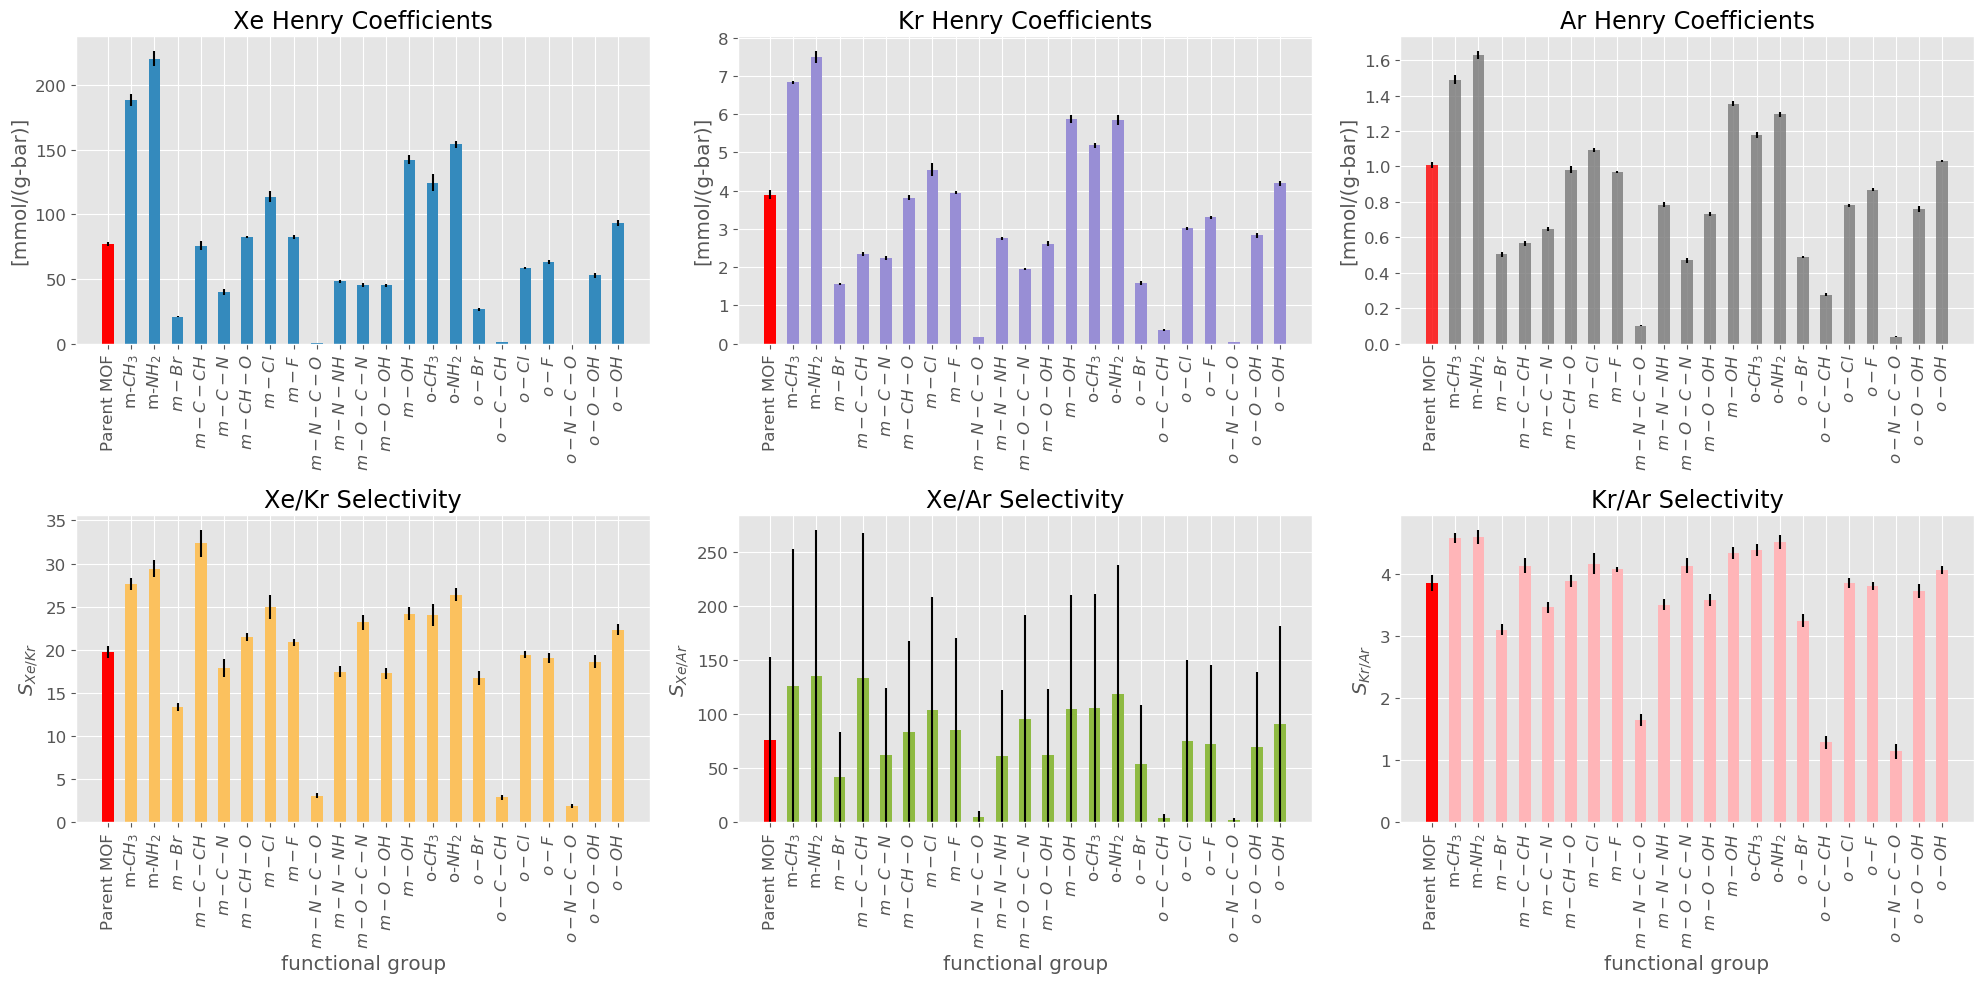

In [16]:
N = length(sorted_names)


fig, axs = plt.subplots(2, 3, figsize=(20, 10))
ind = collect(1:N) 
width = 0.5       

###
# Plot Henry Coefficients
###
# Xenon
xe_err = henry_err_array(henry_results, "Xe")
axs[1].bar(ind, henry_coeff_array(henry_results, "Xe"), yerr=xe_err, 
           width, color=pick_a_color(henry_results, 1))
axs[1].set_ylabel("[mmol/(g-bar)]")
# axs[1].set_xlabel("functional group")
axs[1].set_title("Xe Henry Coefficients")
axs[1].set_xticks(ind)
axs[1].set_xticklabels([pretty_names[key] for key in sorted_names], rotation="vertical")
# axs[1].legend(loc="best", fontsize="x-small")

# Krypton
axs[3].bar(ind, henry_coeff_array(henry_results, "Kr"), yerr=henry_err_array(henry_results, "Kr"),
           width, color=pick_a_color(henry_results, 2))
axs[3].set_ylabel("[mmol/(g-bar)]")
# axs[2].set_xlabel("functional group")
axs[3].set_title("Kr Henry Coefficients")
axs[3].set_xticks(ind)
axs[3].set_xticklabels([pretty_names[key] for key in sorted_names], rotation="vertical")
# axs[2].legend(loc="best", fontsize="x-small")

# Argon
axs[5].bar(ind, henry_coeff_array(henry_results, "Ar"), yerr=henry_err_array(henry_results, "Ar"),
           width, color=pick_a_color(henry_results, 3), alpha=0.8)
axs[5].set_ylabel("[mmol/(g-bar)]")
# axs[3].set_xlabel("functional group")
axs[5].set_title("Ar Henry Coefficients")
axs[5].set_xticks(ind)
axs[5].set_xticklabels([pretty_names[key] for key in sorted_names], rotation="vertical")
# axs[3].legend(loc="best", fontsize="x-small")

###
# Plot Selectivities
###
axs[2].bar(ind, [s_xekr[key]["Xe/Kr"] for key in sorted_names],
           yerr=[s_xekr[key]["err Xe/Kr"] for key in sorted_names],
           width, color=pick_a_color(henry_results, 4))
axs[2].set_xticks(ind)
axs[2].set_xticklabels([pretty_names[key] for key in sorted_names], rotation="vertical")
axs[2].set_ylabel(L"S_{Xe/Kr}")
axs[2].set_xlabel("functional group")
axs[2].set_title("Xe/Kr Selectivity")
# axs[4].legend(loc="best", fontsize="x-small")

axs[4].bar(ind, [s_xear[key]["Xe/Ar"] for key in sorted_names],
           yerr=[s_xear[key]["Xe/Ar"] for key in sorted_names],
           width, color=pick_a_color(henry_results, 5))
axs[4].set_xticks(ind)
axs[4].set_xticklabels([pretty_names[key] for key in sorted_names], rotation="vertical")
axs[4].set_ylabel(L"S_{Xe/Ar}")
axs[4].set_xlabel("functional group")
axs[4].set_title("Xe/Ar Selectivity")
# axs[4].legend(loc="best", fontsize="x-small")

axs[6].bar(ind, [s_krar[key]["Kr/Ar"] for key in sorted_names], 
           yerr=[s_krar[key]["err Kr/Ar"] for key in sorted_names],
           width, color=pick_a_color(henry_results, 6))
axs[6].set_xticks(ind)
axs[6].set_xticklabels([pretty_names[key] for key in sorted_names], rotation="vertical")
axs[6].set_ylabel(L"S_{Kr/Ar}")
axs[6].set_xlabel("functional group")
axs[6].set_title("Kr/Ar Selectivity")
# axs[4].legend(loc="best", fontsize="x-small")


# suptitle(L"NiPyC$_2$ with PBESOL")
tight_layout()
# axs[1].show()
savefig("NiPyC2_pbesol_multipannel_plot.png", dpi=300, format="png")

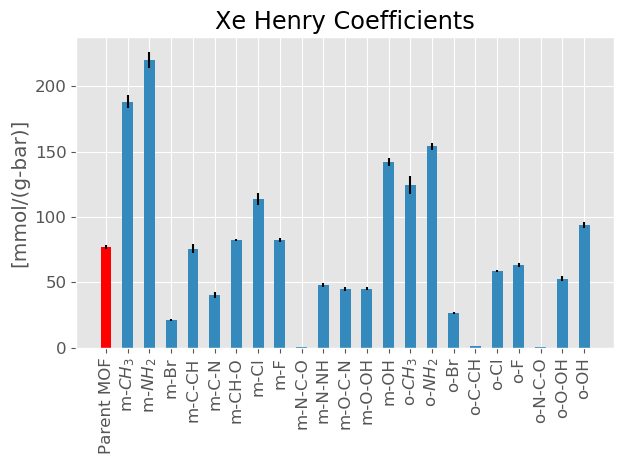

In [17]:
fig, axs = plt.subplots()
ind = collect(1:N) 
width = 0.5       

###
# Plot Henry Coefficients
###
# Xenon
axs.bar(ind, henry_coeff_array(henry_results, "Xe"), yerr=henry_err_array(henry_results, "Xe"), 
           width, color=pick_a_color(henry_results, 1))
axs.set_ylabel("[mmol/(g-bar)]")
# axs[1].set_xlabel("functional group")
axs.set_title("Xe Henry Coefficients")
axs.set_xticks(ind)
axs.set_xticklabels([key for key in sorted_names], rotation="vertical")
# axs[1].legend(loc="best", fontsize="x-small")

tight_layout()